# **NeuroKup - I - Alpha Dia 5**

## **Curso:** Deep Learning
## **Docente:** Robert Wilbert Alzamora Paredes

---

**Estudiante:** Luis Fernando Gutierrez Taqquere

**Código:** 184200

---

## <a name="Escritura">Descripcion del ejercicio</a>




```
En todo el Perú se llevaron a cabo exámenes
estandarizados para evaluar la calidad, nivel
de conocimiento y competencias de los estudiantes
de educación superior. Estas pruebas son parte
de los esfuerzos del Gobierno para monitorear
y mejorar la calidad de educación superior en el país.

Tu tarea será crear un modelo de clasificación que
agrupe de forma precisa los estudiantes en los diferentes
desempeños
(bajo, medio-bajo, medio-alto y alto).
```

In [1]:
#@title instalacion de Paquetes
!pip install autogluon
!pip install sweetviz

In [2]:

import lightgbm as lgb
print(lgb.__version__)

#@title Verifica la GPU
!nvidia-smi

4.5.0
/bin/bash: line 1: nvidia-smi: command not found


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
#@title Importacion de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
from google.colab import files

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb

In [4]:
#@title Funciones necesarias


## <a name="Escritura">PreProcesamiento</a>

In [5]:
#@title Importación de datos
dataSet='kaggle_train_alpha'#@param ['kaggle_train_alpha']
ds = pd.read_csv(dataSet+'.csv')
columnas_disponibles = list(ds.columns)
print(f"@param {columnas_disponibles}")
ds.head()  # Muestra las primeras filas

@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE', 'RENDIMIENTO_ACADÉMICO']


,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE,RENDIMIENTO_ACADÉMICO
0,133959,20203,ADMINISTRACIÓN EN SALUD OCUPACIONAL,LIMA,Entre 850 y menos de 2000 soles,Entre 11 y 20 horas,Nivel D,No,Primaria incompleta,Si,Si,N,Si,No,No,Primaria incompleta,medio-bajo
1,784510,20212,ADMINISTRACION DE EMPRESAS,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,medio-alto
2,535024,20183,INGENIERIA AMBIENTAL Y SANITARIA,CAJAMARCA,Entre 850 y menos de 2000 soles,Menos de 10 horas,Nivel D,No,Primaria completa,Si,No,N,No,Si,No,Primaria completa,medio-alto
3,591650,20212,CONTADURIA PUBLICA,LIMA,Entre 850 y menos de 2000 soles,Más de 30 horas,Nivel C,Si,Primaria incompleta,Si,No,N,No,Si,Si,Primaria completa,medio-bajo
4,635933,20195,CONTADURIA PUBLICA,PIURA,Entre 2000 y menos de 3500 soles,Más de 30 horas,Nivel C,Si,Educación profesional completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto


In [6]:
#@title Informacion de el dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         548957 non-null  object
 5   HORAS_SEMANALES_TRABAJO       529330 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  528330 non-null  object
 7   CUENTA_CON_INTERNET           532749 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         535448 non-null  object
 9   CUENTA_CON_LAVADORA           522281 non-null  object
 10  TIENE_CARRO                   519221 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  548782 non-null  object
 13 

In [7]:
# Eliminamos las columnas con valores nulos en el DataFrame `ds`
# ds = ds.dropna(axis=0, how='any')

# Verificamos el nuevo DataFrame
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         548957 non-null  object
 5   HORAS_SEMANALES_TRABAJO       529330 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  528330 non-null  object
 7   CUENTA_CON_INTERNET           532749 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         535448 non-null  object
 9   CUENTA_CON_LAVADORA           522281 non-null  object
 10  TIENE_CARRO                   519221 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  548782 non-null  object
 13 

In [8]:
#@title Mostrar porcentaje de valores nulos por columna
nulos = ds.isnull().mean() * 100
print(nulos.sort_values(ascending=False))


TIENE_CARRO                     6.277798
CUENTA_CON_LAVADORA             5.725451
CUENTA_CON_ORDENADOR            5.482852
NIVEL_SOCIECONÓMICO_VIVIENDA    4.633574
HORAS_SEMANALES_TRABAJO         4.453069
CUENTA_CON_INTERNET.1           3.835921
CUENTA_CON_INTERNET             3.835921
NIVEL_EDUCATIVO_MADRE           3.416606
NIVEL_EDUCATIVO_PADRE           3.348736
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0.941877
COSTO_MATRÍCULA_SOLES           0.910289
CÓDIGO                          0.000000
ANTECEDENTES_PENALES            0.000000
PERIODO_RESULTADOS              0.000000
CIUDAD                          0.000000
CARRERA_PROFESIONAL             0.000000
RENDIMIENTO_ACADÉMICO           0.000000
dtype: float64


In [9]:
#@title Eliminar columna duplicada
# ds = ds.drop(columns=['CUENTA_CON_INTERNET.1'])


In [10]:
#@title Imputar Columnas categóricas
categoricas = ['TIENE_CARRO', 'CUENTA_CON_LAVADORA', 'CUENTA_CON_ORDENADOR',
               'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET','CUENTA_CON_INTERNET.1',
               'NIVEL_EDUCATIVO_MADRE', 'NIVEL_EDUCATIVO_PADRE','COSTO_MATRÍCULA_SOLES',
               'PAGÓ_MATRÍCULA_POR_SU_CUENTA','HORAS_SEMANALES_TRABAJO']

for col in categoricas:
    ds[col] = ds[col].fillna(ds[col].mode()[0])  # Imputar con moda


In [11]:
#@title imputar Columnas numéricas
# numericas = [ '']
# for col in numericas:
#     ds[col] = pd.to_numeric(ds[col], errors='coerce')  # Asegurar que sean numéricas
#     ds[col] = ds[col].fillna(ds[col].median())  # Imputar con mediana


In [12]:
#@title Verificación de que no queden nulos
print(ds.isnull().sum())


CÓDIGO                          0
PERIODO_RESULTADOS              0
CARRERA_PROFESIONAL             0
CIUDAD                          0
COSTO_MATRÍCULA_SOLES           0
HORAS_SEMANALES_TRABAJO         0
NIVEL_SOCIECONÓMICO_VIVIENDA    0
CUENTA_CON_INTERNET             0
NIVEL_EDUCATIVO_PADRE           0
CUENTA_CON_LAVADORA             0
TIENE_CARRO                     0
ANTECEDENTES_PENALES            0
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0
CUENTA_CON_ORDENADOR            0
CUENTA_CON_INTERNET.1           0
NIVEL_EDUCATIVO_MADRE           0
RENDIMIENTO_ACADÉMICO           0
dtype: int64


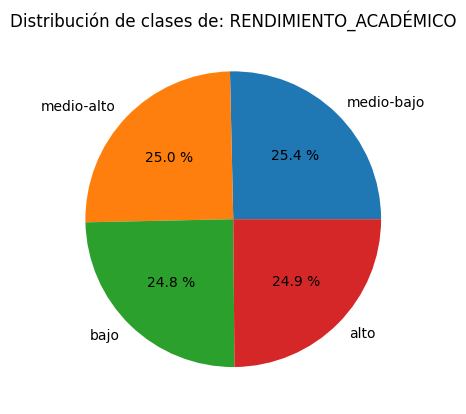

In [13]:
#@title Distribucion de clases
# vista gráfica de la distribución de clases
atributo_Principal = 'RENDIMIENTO_ACADÉMICO'#@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE', 'RENDIMIENTO_ACADÉMICO']
categorias_unicas = ds[atributo_Principal].unique()
distribucion = ds.groupby(atributo_Principal).size()
plt.pie(distribucion, labels =categorias_unicas, autopct="%0.1f %%")
plt.title('Distribución de clases de: '+ atributo_Principal)
plt.show()

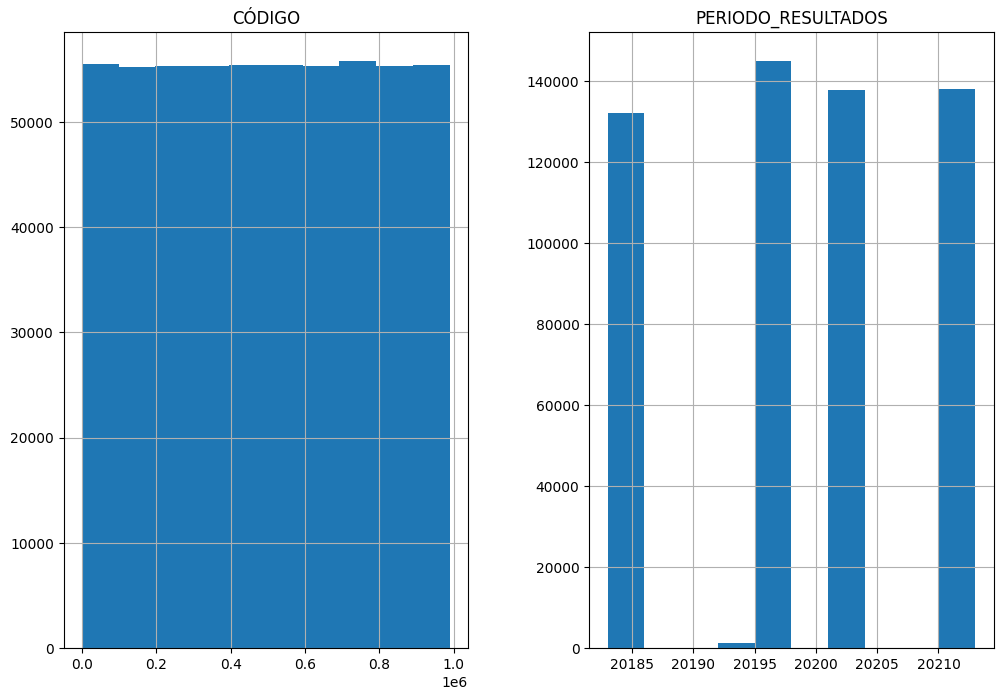

In [14]:
#@title Histograma
ds.hist(figsize=(12,8))
plt.show()

In [15]:
#@title Informacion de el dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         554000 non-null  object
 5   HORAS_SEMANALES_TRABAJO       554000 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  554000 non-null  object
 7   CUENTA_CON_INTERNET           554000 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         554000 non-null  object
 9   CUENTA_CON_LAVADORA           554000 non-null  object
 10  TIENE_CARRO                   554000 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  554000 non-null  object
 13 

In [16]:
#@title Distribucion de clases
# vista gráfica de la distribución de clases
atributo_Principal = 'CARRERA_PROFESIONAL'#@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE', 'RENDIMIENTO_ACADÉMICO']
categorias_unicas = ds[atributo_Principal].unique()
print(categorias_unicas)

['ADMINISTRACIÓN EN SALUD OCUPACIONAL' 'ADMINISTRACION DE EMPRESAS'
 'INGENIERIA AMBIENTAL Y SANITARIA' 'CONTADURIA PUBLICA'
 'ADMINISTRACION PUBLICA' 'INGENIERÍA INDUSTRIAL' 'PSICOLOGIA'
 'LICENCIATURA EN PEDAGOGIA INFANTIL' 'ADMINISTRACIÓN FINANCIERA'
 'ADMINISTRACIÓN DE EMPRESAS' 'COMUNICACION SOCIAL- PERIODISMO'
 'INGENIERIA INDUSTRIAL'
 'LICENCIATURA EN EDUCACIÓN FÍSICA, RECREACIÓN Y DEPORTE' 'JURISPRUDENCIA'
 'DISEÑO GRAFICO' 'DISEÑO INDUSTRIAL' 'DERECHO'
 'INGENIERÍA AGROINDUSTRIAL' 'TRABAJO SOCIAL' 'MEDICINA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN CIENCIAS SOCIALES'
 'ESTUDIOS MUSICALES' 'MATEMATICAS' 'ENFERMERIA' 'INGENIERIA DE SISTEMAS'
 'INGENIERIA MECANICA' 'MERCADEO' 'ADMINISTRACION FINANCIERA'
 'CONTADURÍA PÚBLICA' 'ADMINISTRACION PUBLICA TERRITORIAL' 'MUSICA'
 'INGENIERIA AMBIENTAL' 'COMUNICACION AUDIOVISUAL Y MULTIMEDIOS'
 'INGENIERIA EN HIGIENE Y SEGURIDAD INDUSTRIAL' 'PSICOLOGÍA'
 'NEGOCIOS INTERNACIONALES' 'INGENIERIA DE PRODUCTIVIDAD Y CALIDAD'
 'LICENCIA

In [17]:
#@title carreras tecnologicas
carreras_tecnologicas = [
    'INGENIERÍA INDUSTRIAL',
    'DISEÑO GRÁFICO',
    'DISEÑO INDUSTRIAL',
    'INGENIERÍA DE SISTEMAS',
    'INGENIERÍA MECÁNICA',
    'INGENIERÍA AMBIENTAL',
    'COMUNICACIÓN AUDIOVISUAL Y MULTIMEDIOS',
    'INGENIERÍA DE PRODUCTIVIDAD Y CALIDAD',
    'INGENIERÍA MECATRÓNICA - CICLO PROFESIONAL UNIVERSITARIO',
    'INGENIERÍA ELECTRÓNICA',
    'INGENIERÍA AMBIENTAL',
    'INGENIERÍA BIOTECNOLÓGICA',
    'INGENIERÍA BIOMÉDICA',
    'INGENIERÍA CIVIL',
    'INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL',
    'ARQUITECTURA',
    'INGENIERÍA INFORMÁTICA',
    'INGENIERÍA DE ALIMENTOS',
    'INGENIERÍA DE SOFTWARE',
    'INGENIERÍA QUÍMICA',
    'INGENIERÍA EN TELECOMUNICACIONES',
    'INGENIERÍA DE PRODUCCIÓN',
    'CONSTRUCCIÓN EN ARQUITECTURA E INGENIERÍA',
    'INGENIERÍA ELÉCTRICA',
    'DISEÑO VISUAL',
    'CONSTRUCCIÓN Y GESTIÓN EN ARQUITECTURA',
    'INGENIERÍA DE DISEÑO DE PRODUCTO',
    'DIRECCIÓN Y PRODUCCIÓN DE CINE Y TELEVISIÓN',
    'INGENIERIA DE SISTEMAS',
    'CIENCIAS DE LA COMPUTACIÓN E INTELIGENCIA ARTIFICIAL',
    'INGENIERÍA CIVIL',
    'INGENIERIA MECATRONICA',
    'INGENIERIA MULTIMEDIA',
    'DISEÑO GRAFICO',
    'INGENIERÍA DE SOFTWARE',
    'INGENIERIA INFORMATICA',
    'DISEÑO DE MEDIOS INTERACTIVOS',
    'INGENIERIA ELECTRONICA',
    'INGENIERIA MECATRÓNICA',
    'INGENIERIA EN TELEMATICA',
    'INGENIERIA AERONAUTICA',
    'INGENIERIA BIOMEDICA',
    'INGENIERIA AGROINDUSTRIAL',
    'INGENIERIA DE PRODUCCION',
    'INGENIERIA MECANICA',
    'INGENIERIA QUIMICA',
    'INGENIERIA EN TELECOMUNICACIONES',
    'INGENIERIA ADMINISTRATIVA',
    'COMUNICACION AUDIOVISUAL Y MULTIMEDIOS',
    'INGENIERIA MATEMATICA',
    'INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL',
    'INGENIERÍA ELECTRÓNICA',
    'INGENIERÍA ELÉCTRICA',
    'INGENIERIA BIOTECNOLOGICA',
    'INGENIERÍA DE SISTEMAS Y COMPUTACION',
    'INGENIERIA ELECTROMECANICA',
    'DISEÑO INDUSTRIAL',
    'ARQUITECTURA',
    'INGENIERIA EN INFORMATICA',
    'INGENIERIA DE SISTEMAS Y TELECOMUNICACIONES',
    'FOTOGRAFÍA Y COMUNICACIÓN VISUAL',
    'ARTES DE LA GRABACION Y PRODUCCION MUSICAL',
    'DISEÑO GRÀFICO',
    'INGENIERIA DE PROCESOS INDUSTRIALES',
    'DISEÑO DE COMUNICACION VISUAL',
    'ARTES AUDIOVISUALES',
    'INGENIERIA TELEMÁTICA',
    'INGENIERIA DE SISTEMAS Y COMPUTACION',
    'INGENIERIA EN ENERGIAS',
    'ADMINISTRACION DE SISTEMAS INFORMÁTICOS',
    'DISEÑO DE LA COMUNICACION GRAFICA',
    'MARKETING',
    'COMPUTACIÓN CIENTÍFICA',
    'ADMINISTRACION INFORMÁTICA',
    'ADMINISTRACION FINANCIERA Y DE SISTEMAS',
    'INGENIERÍA EN TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES',
    'INGENIERÍA EN AUTOMATIZACIÓN',
    'INGENIERIA DE SISTEMAS INFORMÁTICOS',
    'INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES',
    'ADMINISTRACION DE SISTEMAS INFORMATICOS',
    'INGENIERÍA AERONÁUTICA',
    'CINE Y AUDIOVISUALES',
    'INGENIERÌA INFORMÀTICA',
    'DISEÑO VISUAL DIGITAL',
    'INGENIERIA EN AUTOMATIZACIÓN',
    'INGENIERIA EN SOFTWARE',
    'INGENIERÍA EN LOGISTICA Y OPERACIONES',
    'INGENIERÍA EN PROCESOS AGROINDUSTRIALES',
    'INGENIERIA DE SISTEMAS CON ENFASIS EN TELECOMUNICACIONES',
    'INGENIERIA DE SISTEMAS DE INFORMACION',
    'MATEMÁTICAS APLICADAS Y CIENCIAS DE LA COMPUTACIÓN',
    'INGENIER¿A EL¿CTRICA',
    'COMUNICACIÓN AUDIOVISUAL Y DIGITAL',
    'COMUNICACI¿N VISUAL',
    'INGENIERIA EN CONTROL Y AUTOMATIZACIÓN',
    'INGENIERIA DE SOFTWARE Y COMUNICACIONES',
    'INGENIERIA MECATRONICO',
    'INGENIERIA ELÉCTRICA',
    'PROFESIONAL EN DISEÑO DE MODAS',
    'DISEÑO CROSSMEDIA',
    'ADMINISTRACION DE SISTEMAS',
    'INGENIERIA EN AUTOMATIZACION INDUSTRIAL',
    'GESTIÓN DE SISTEMAS DE INFORMACIÓN',
    'INGENIIERIA DE SOFTWARE',
    'PROFESIONAL EN PUBLICIDAD Y MERCADEO',
    'CIENCIAS DE LA COMPUTACION'
]


In [18]:
#@title Crear una nueva columna "ES_TECNOLOGICA_Y_TIENE_PC"
# Crear una nueva columna "ES_TECNOLOGICA_Y_TIENE_PC"
ds['ES_TECNOLOGICA_Y_TIENE_PC'] = (
    ds['CARRERA_PROFESIONAL'].isin(carreras_tecnologicas) &
    (ds['CUENTA_CON_ORDENADOR'] == 'Si')
).astype(int)  # Convertir a 1 (Sí) y 0 (No)

# Verificar resultado
print(ds[['CARRERA_PROFESIONAL', 'CUENTA_CON_ORDENADOR', 'ES_TECNOLOGICA_Y_TIENE_PC']].head(100))


                              CARRERA_PROFESIONAL CUENTA_CON_ORDENADOR  \
0             ADMINISTRACIÓN EN SALUD OCUPACIONAL                   No   
1                      ADMINISTRACION DE EMPRESAS                   Si   
2                INGENIERIA AMBIENTAL Y SANITARIA                   Si   
3                              CONTADURIA PUBLICA                   Si   
4                              CONTADURIA PUBLICA                   Si   
..                                            ...                  ...   
95                                 JURISPRUDENCIA                   Si   
96                             CONTADURIA PUBLICA                   Si   
97  LICENCIATURA EN ESPAÑOL Y LENGUAS EXTRANJERAS                   Si   
98                           INGENIERIA BIOMEDICA                   Si   
99                               INGENIERIA CIVIL                   Si   

    ES_TECNOLOGICA_Y_TIENE_PC  
0                           0  
1                           0  
2              

In [19]:

#@title Convertir las columnas categóricas a valores numéricos
le = LabelEncoder()
data_train = ds.copy()
categorical_cols = ['CARRERA_PROFESIONAL', 'CIUDAD', 'NIVEL_SOCIECONÓMICO_VIVIENDA',
                    'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA','CUENTA_CON_INTERNET.1',
                    'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA',
                    'CUENTA_CON_ORDENADOR', 'NIVEL_EDUCATIVO_MADRE','HORAS_SEMANALES_TRABAJO','COSTO_MATRÍCULA_SOLES'
                    ,'RENDIMIENTO_ACADÉMICO']

for col in categorical_cols:
    data_train[col] = le.fit_transform(data_train[col])

['COSTO_MATRÍCULA_SOLES','NIVEL_SOCIECONÓMICO_VIVIENDA','HORAS_SEMANALES_TRABAJO','TIENE_CARRO','PAGÓ_MATRÍCULA_POR_SU_CUENTA','RENDIMIENTO_ACADÉMICO']
['CUENTA_CON_INTERNET','CUENTA_CON_ORDENADOR','TIENE_CARRO','NIVEL_SOCIECONÓMICO_VIVIENDA','CUENTA_CON_LAVADORA']
['NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE','NIVEL_SOCIECONÓMICO_VIVIENDA']
# Convertir 'COSTO_MATRÍCULA_SOLES' a tipo numérico (si es necesario)
# data_train['COSTO_MATRÍCULA_SOLES'] = pd.to_numeric(data_train['COSTO_MATRÍCULA_SOLES'], errors='coerce')
# Convertir 'RENDIMIENTO_ACADÉMICO' a valores numéricos (si es categórico)
y = data_train['RENDIMIENTO_ACADÉMICO']
X_corr = data_train.drop(columns=['CÓDIGO'])  # Excluir 'CÓDIGO' y 'RENDIMIENTO_ACADÉMICO'
X = data_train.drop(columns=['CÓDIGO', 'RENDIMIENTO_ACADÉMICO','HORAS_SEMANALES_TRABAJO','PAGÓ_MATRÍCULA_POR_SU_CUENTA'])  # Excluir 'CÓDIGO' y 'RENDIMIENTO_ACADÉMICO'


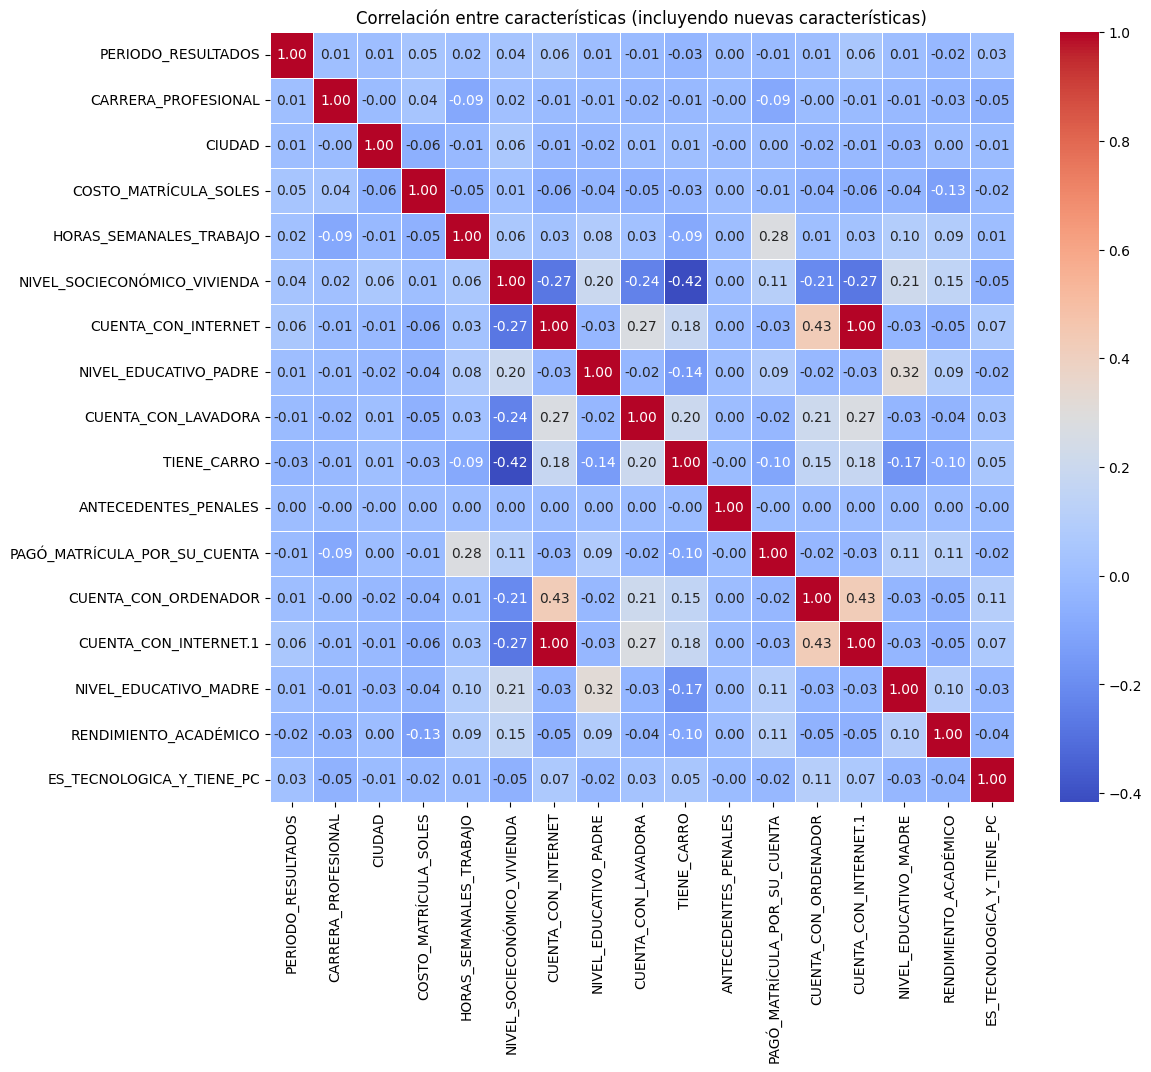

In [20]:
#@title Correlación entre las características, incluyendo las nuevas características, y la variable objetivo
correlation_matrix = X_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre características (incluyendo nuevas características)")
plt.show()

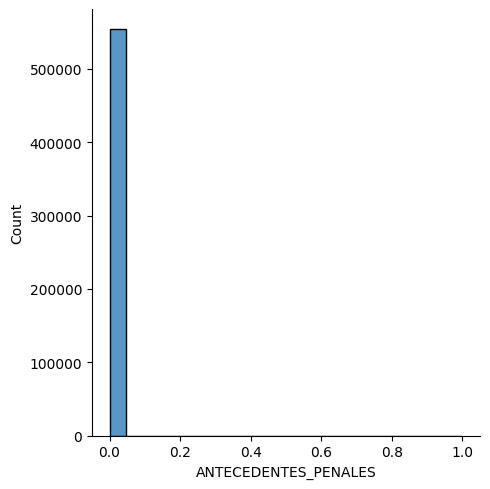

In [21]:
#@title gráfico de distribución
atributo_Detalle = 'ANTECEDENTES_PENALES'#@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE', 'RENDIMIENTO_ACADÉMICO']
value = X_corr[atributo_Detalle]
sns.displot(value)

In [22]:
#@title Separacion de datos de prueba y entrenamiento
#@markdown * Ingrese la distribucion de datos de entrenamiento y test entre 0 y 1
separacion_ds = 0.2 #@param {type:"slider", min:0.01, max:0.99, step:0.01}
random_state = 42 #@param {type:"slider", min:1, max:100, step:1}

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=separacion_ds, random_state=random_state)


In [23]:
distribucion_1=['COSTO_MATRÍCULA_SOLES','NIVEL_SOCIECONÓMICO_VIVIENDA','HORAS_SEMANALES_TRABAJO','TIENE_CARRO','PAGÓ_MATRÍCULA_POR_SU_CUENTA']
distribucion_2=['CUENTA_CON_INTERNET','CUENTA_CON_ORDENADOR','TIENE_CARRO','NIVEL_SOCIECONÓMICO_VIVIENDA','CUENTA_CON_LAVADORA']
distribucion_3=['NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE','NIVEL_SOCIECONÓMICO_VIVIENDA','HORAS_SEMANALES_TRABAJO','PAGÓ_MATRÍCULA_POR_SU_CUENTA']

In [24]:
# Convertir 'RENDIMIENTO_ACADÉMICO' a valores numéricos (si es categórico)
x_1=ds[distribucion_1]
x_2=ds[distribucion_2]
x_3=ds[distribucion_3]
y_cat=ds['RENDIMIENTO_ACADÉMICO']
print(y_cat)

0         medio-bajo
1         medio-alto
2         medio-alto
3         medio-bajo
4         medio-alto
             ...    
553995    medio-alto
553996    medio-bajo
553997          bajo
553998    medio-bajo
553999          bajo
Name: RENDIMIENTO_ACADÉMICO, Length: 554000, dtype: object


In [25]:
# Verificar cardinalidad
for col in ds.select_dtypes(include=['object']):
    print(f"{col}: {ds[col].nunique()} categorías")


CARRERA_PROFESIONAL: 941 categorías
CIUDAD: 31 categorías
COSTO_MATRÍCULA_SOLES: 8 categorías
HORAS_SEMANALES_TRABAJO: 5 categorías
NIVEL_SOCIECONÓMICO_VIVIENDA: 6 categorías
CUENTA_CON_INTERNET: 2 categorías
NIVEL_EDUCATIVO_PADRE: 12 categorías
CUENTA_CON_LAVADORA: 2 categorías
TIENE_CARRO: 2 categorías
ANTECEDENTES_PENALES: 2 categorías
PAGÓ_MATRÍCULA_POR_SU_CUENTA: 2 categorías
CUENTA_CON_ORDENADOR: 2 categorías
CUENTA_CON_INTERNET.1: 2 categorías
NIVEL_EDUCATIVO_MADRE: 12 categorías
RENDIMIENTO_ACADÉMICO: 4 categorías


In [26]:
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [27]:
import unidecode
import string

processds=ds.copy()
# Función para limpiar y normalizar texto
def limpiar_carrera(carrera):
    # Eliminar tildes (acentos) usando unidecode
    carrera_sin_tildes = unidecode.unidecode(carrera)
    # Eliminar signos de puntuación y espacios extra
    carrera_limpia = carrera_sin_tildes.translate(str.maketrans('', '', string.punctuation))
    # Convertir a minúsculas y eliminar espacios adicionales
    carrera_limpia = carrera_limpia.lower().strip()
    return carrera_limpia

# Aplicar la función para crear la nueva columna
processds['CARRERA_PROFESIONAL'] = ds['CARRERA_PROFESIONAL'].apply(limpiar_carrera)

# Verificar las primeras filas
print(processds[['CARRERA_PROFESIONAL']].head())


                   CARRERA_PROFESIONAL
0  administracion en salud ocupacional
1           administracion de empresas
2     ingenieria ambiental y sanitaria
3                   contaduria publica
4                   contaduria publica


In [28]:
# Verificar cardinalidad
for col in processds.select_dtypes(include=['object']):
    print(f"{col}: {processds[col].nunique()} categorías")

CARRERA_PROFESIONAL: 770 categorías
CIUDAD: 31 categorías
COSTO_MATRÍCULA_SOLES: 8 categorías
HORAS_SEMANALES_TRABAJO: 5 categorías
NIVEL_SOCIECONÓMICO_VIVIENDA: 6 categorías
CUENTA_CON_INTERNET: 2 categorías
NIVEL_EDUCATIVO_PADRE: 12 categorías
CUENTA_CON_LAVADORA: 2 categorías
TIENE_CARRO: 2 categorías
ANTECEDENTES_PENALES: 2 categorías
PAGÓ_MATRÍCULA_POR_SU_CUENTA: 2 categorías
CUENTA_CON_ORDENADOR: 2 categorías
CUENTA_CON_INTERNET.1: 2 categorías
NIVEL_EDUCATIVO_MADRE: 12 categorías
RENDIMIENTO_ACADÉMICO: 4 categorías


In [29]:
# Contar las carreras más frecuentes
top_carreras = processds['CIUDAD'].value_counts()

# Calcular el total de registros
total_registros = processds['CIUDAD'].count()

# Calcular el porcentaje acumulado
top_carreras_acumulado = top_carreras.cumsum() / total_registros

# Determinar cuántas carreras tomar para cubrir el 80% de los registros
top_n = top_carreras_acumulado[top_carreras_acumulado <= 0.80].count()

# Mostrar el top_n de carreras que cubren el 80%
print(f"Tomar las primeras {top_n} carreras que cubren el 80% de los registros.")


Tomar las primeras 9 carreras que cubren el 80% de los registros.


In [30]:
processds['CIUDAD'].unique()

array(['LIMA', 'CAJAMARCA', 'PIURA', 'PUERTO INCA', 'HUANCAYO',
       'AREQUIPA', 'TRUJILLO', 'PUERTO MALDONADO', 'CUSCO', 'MOQUEGUA',
       'TARAPOTO', 'TACNA', 'JULIACA', 'AYACUCHO', 'IQUITOS', 'PUNO',
       'ICA', 'CHICLAYO', 'TUMBES', 'CHIMBOTE', 'HUÁNUCO', 'SULLANA',
       'PUCALLPA', 'ABANCAY', 'BAGUA', 'HUARAZ', 'CERRO DE PASCO',
       'MADRE DE DIOS', 'UCAYALI', 'LORETO', 'ILO'], dtype=object)

In [31]:
ciudades_a_region = {
    'LIMA': 'Costa',
    'CAJAMARCA': 'Sierra',
    'PIURA': 'Costa',
    'PUERTO INCA': 'Selva',
    'HUANCAYO': 'Sierra',
    'AREQUIPA': 'Sierra',
    'TRUJILLO': 'Costa',
    'PUERTO MALDONADO': 'Selva',
    'CUSCO': 'Sierra',
    'MOQUEGUA': 'Sierra',
    'TARAPOTO': 'Selva',
    'TACNA': 'Costa',
    'JULIACA': 'Sierra',
    'AYACUCHO': 'Sierra',
    'IQUITOS': 'Selva',
    'PUNO': 'Sierra',
    'ICA': 'Costa',
    'CHICLAYO': 'Costa',
    'TUMBES': 'Costa',
    'CHIMBOTE': 'Costa',
    'HUÁNUCO': 'Sierra',
    'SULLANA': 'Costa',
    'PUCALLPA': 'Selva',
    'ABANCAY': 'Sierra',
    'BAGUA': 'Selva',
    'HUARAZ': 'Sierra',
    'CERRO DE PASCO': 'Sierra',
    'MADRE DE DIOS': 'Selva',
    'UCAYALI': 'Selva',
    'LORETO': 'Selva',
    'ILO': 'Costa'
}
# Asignar la región a cada ciudad en la columna 'Region'
processds['Region'] = processds['CIUDAD'].map(ciudades_a_region)

# Si alguna ciudad no está en el diccionario, asignarla como 'Otra'
processds['Region'] = processds['Region'].fillna('Otra')

# Verificar los primeros registros
print(processds[['CIUDAD', 'Region']].head())

# Verificar cuántos registros hay por región
print(processds['Region'].value_counts())


      CIUDAD  Region
0       LIMA   Costa
1       LIMA   Costa
2  CAJAMARCA  Sierra
3       LIMA   Costa
4      PIURA   Costa
Region
Costa     341222
Sierra    175983
Selva      36795
Name: count, dtype: int64


In [32]:
# Obtener las 30 carreras más frecuentes
top_5_ciudades = processds['CIUDAD'].value_counts().head(9).index.tolist()

# Verificar la cantidad de registros por cada categoría ahora
print(processds['CIUDAD'].value_counts())

CIUDAD
LIMA                225427
AREQUIPA             67157
CUSCO                35649
TRUJILLO             32867
PIURA                23047
CHICLAYO             18028
HUANCAYO             16561
TACNA                11285
ICA                  11264
PUNO                 10746
PUCALLPA             10072
TARAPOTO              9728
IQUITOS               9523
CHIMBOTE              9282
CAJAMARCA             9189
JULIACA               8036
HUÁNUCO               7550
MOQUEGUA              7018
AYACUCHO              6669
TUMBES                6578
PUERTO MALDONADO      6298
HUARAZ                3817
SULLANA               3437
CERRO DE PASCO        2118
ABANCAY               1473
BAGUA                  627
PUERTO INCA            473
UCAYALI                 34
MADRE DE DIOS           29
LORETO                  11
ILO                      7
Name: count, dtype: int64


In [33]:
# Obtener las 30 carreras más frecuentes
top_30_carreras = processds['CARRERA_PROFESIONAL'].value_counts().head(68).index.tolist()

# Reemplazar las demás carreras con 'otras'
processds['carrerasReducido'] = processds['CARRERA_PROFESIONAL'].apply(lambda x: x if x in top_30_carreras else 'otras')

# Verificar las primeras filas con la nueva columna
print(processds[['CARRERA_PROFESIONAL', 'carrerasReducido']].head())

# Verificar la cantidad de registros por cada categoría ahora
print(processds['carrerasReducido'].value_counts())


                   CARRERA_PROFESIONAL                     carrerasReducido
0  administracion en salud ocupacional  administracion en salud ocupacional
1           administracion de empresas           administracion de empresas
2     ingenieria ambiental y sanitaria     ingenieria ambiental y sanitaria
3                   contaduria publica                   contaduria publica
4                   contaduria publica                   contaduria publica
carrerasReducido
otras                                   111565
administracion de empresas               61210
derecho                                  42723
contaduria publica                       41653
psicologia                               39367
                                         ...  
seguridad y salud en el trabajo           1172
ingenieria agroindustrial                 1151
ingenieria informatica                    1121
quimica                                   1097
administracion de servicios de salud      1069
Name: coun

In [34]:
processds["PERIODO_RESULTADOS"].unique()

array([20203, 20212, 20183, 20195, 20194, 20213, 20184, 20196, 20202])

In [35]:
# Crear las nuevas columnas 'año' y 'periodo' a partir de 'PERIODO_RESULTADOS'
processds['año'] = processds['PERIODO_RESULTADOS'].astype(str).str[:4].astype(int)  # Los primeros 4 dígitos
processds['periodo'] = processds['PERIODO_RESULTADOS'].astype(str).str[-1].astype(int)  # El último dígito

In [36]:
# Función para clasificar el esfuerzo
def clasificar_esfuerzo(row):
    trabajo = row['HORAS_SEMANALES_TRABAJO']
    nivel = row['NIVEL_SOCIECONÓMICO_VIVIENDA']

    if pd.isna(trabajo) or pd.isna(nivel):
        return 'Desconocido'

    if nivel in ['Nivel D', 'Nivel E']:
        if trabajo == 'Más de 30 horas':
            return 'Alto'
        elif trabajo in ['Entre 21 y 30 horas', 'Entre 11 y 20 horas']:
            return 'Medio Alto'
        else:
          return 'Dedicado_Vago'
    elif nivel in ['Nivel A', 'Nivel B', 'Nivel C']:
        if trabajo in ['Entre 21 y 30 horas', 'Entre 11 y 20 horas']:
            return 'Medio Bajo'
        elif trabajo in ['Menos de 10 horas', '0']:
            return 'Bajo'
        else:
          return 'Ambicioso'

    return 'Desconocido'

# Aplicar la función para crear la nueva columna
processds['Esfuerzo'] = processds.apply(clasificar_esfuerzo, axis=1)


Esfuerzo
Alto             127569
Ambicioso         95827
Medio Alto        91641
Dedicado_Vago     82303
Bajo              79693
Medio Bajo        74337
Desconocido        2630
Name: count, dtype: int64


<ipython-input-37-37d2499188c5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processds, x='Esfuerzo', order=distribution.index, palette="viridis")


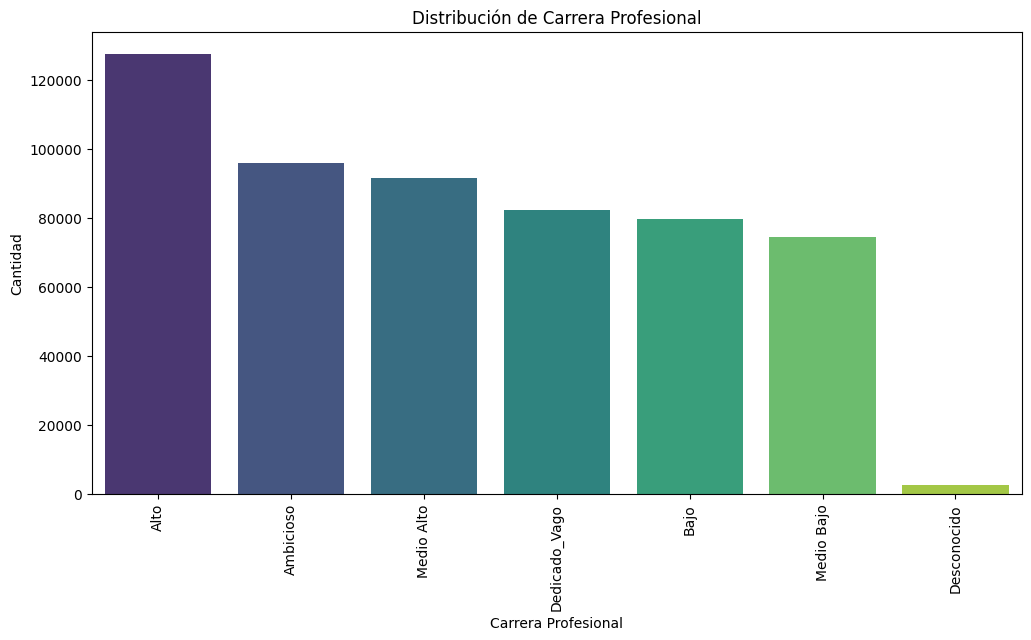

In [37]:
# Ver la distribución de frecuencias
distribution = processds['Esfuerzo'].value_counts()

# Mostrar las primeras filas
print(distribution)

# Visualizar con un gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=processds, x='Esfuerzo', order=distribution.index, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribución de Carrera Profesional')
plt.xlabel('Carrera Profesional')
plt.ylabel('Cantidad')
plt.show()


##Nuevas filas


In [38]:
processds.info()

#41.34 Newprocessds=processds.drop(columns=['Esfuerzo','CIUDAD','PERIODO_RESULTADOS','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#40.43 Newprocessds=processds.drop(columns=['CIUDAD','PERIODO_RESULTADOS','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#41.37% Newprocessds=processds.drop(columns=['Esfuerzo','CIUDAD','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#42.92% Newprocessds=processds.drop(columns=[])
#43.23% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','PERIODO_RESULTADOS'])
#43.19% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','PERIODO_RESULTADOS'])
#42.71% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','PERIODO_RESULTADOS','Esfuerzo'])
#42.96% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES'])
#42.71% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','carrerasReducido'])
#42.15% Newprocessds=processds.drop(columns=['CARRERA_PROFESIONAL','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año','CÓDIGO'])
#43.09% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año','CÓDIGO'])
#42.96% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año'])
#43.30% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO'])
#43.21% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','NIVEL_SOCIECONÓMICO_VIVIENDA'])
#42.04% Newprocessds=processds.drop(columns=['HORAS_SEMANALES_TRABAJO','carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','NIVEL_SOCIECONÓMICO_VIVIENDA'])
#43.34% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET'])
#42.91% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET','NIVEL_EDUCATIVO_PADRE'])
#43.68% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET.1'])
#43.09% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET.1','CUENTA_CON_INTERNET'])

Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET.1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554000 entries, 0 to 553999
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        554000 non-null  int64 
 1   PERIODO_RESULTADOS            554000 non-null  int64 
 2   CARRERA_PROFESIONAL           554000 non-null  object
 3   CIUDAD                        554000 non-null  object
 4   COSTO_MATRÍCULA_SOLES         554000 non-null  object
 5   HORAS_SEMANALES_TRABAJO       554000 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  554000 non-null  object
 7   CUENTA_CON_INTERNET           554000 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         554000 non-null  object
 9   CUENTA_CON_LAVADORA           554000 non-null  object
 10  TIENE_CARRO                   554000 non-null  object
 11  ANTECEDENTES_PENALES          554000 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  554000 non-null  object
 13 

In [39]:
ds=Newprocessds

##Implemetar AutoGluton

In [40]:

# Convertir las columnas de tipo 'object' a categorías
dataGluton = ds.copy()
df_train, df_test = train_test_split(dataGluton, test_size=0.01, random_state=69)

# Agregar los duplicados al DataFrame original
dataGluton = df_train


categorical_columns = dataGluton.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dataGluton[col] = dataGluton[col].astype('category')

# Dividir los datos en características (X) y etiqueta (y)
X_gluton = dataGluton.drop(columns=['RENDIMIENTO_ACADÉMICO' ])
y_gluton = dataGluton['RENDIMIENTO_ACADÉMICO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_gluton, y_gluton, test_size=0.2, random_state=69)



In [41]:
from autogluon.tabular import TabularPredictor

# Definir la variable objetivo y la columna de las características
predictor = TabularPredictor(label='RENDIMIENTO_ACADÉMICO').fit(train_data=X_train.join(y_train),time_limit=6000)

# Evaluar el modelo en los datos de prueba
performance = predictor.evaluate(X_test.join(y_test))

# Ver el mejor modelo
print(predictor.leaderboard())


No path specified. Models will be saved in: "AutogluonModels/ag-20241130_040539"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.92 GB / 12.67 GB (78.3%)
Disk Space Avail:   74.08 GB / 107.72 GB (68.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

                 model  score_val eval_metric  pred_time_val    fit_time  \
0  WeightedEnsemble_L2   0.457612    accuracy       0.292398  483.208644   
1      NeuralNetFastAI   0.454193    accuracy       0.071477  421.857100   
2           LightGBMXT   0.445533    accuracy       0.219313   61.166658   
3             LightGBM   0.438241    accuracy       0.046970   17.754718   
4     RandomForestGini   0.411121    accuracy       0.089140   50.192056   
5       KNeighborsDist   0.271650    accuracy       8.792879    2.011972   
6       KNeighborsUnif   0.271650    accuracy      12.808477   12.556240   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.001608           0.184887            2       True   
1                0.071477         421.857100            1       True   
2                0.219313          61.166658            1       True   
3                0.046970          17.754718            1       True   
4                0.089140      

In [42]:
# Separar las características (X) y las etiquetas reales (Y)
X_gluton_test = df_test.drop(columns=['RENDIMIENTO_ACADÉMICO'])  # Eliminar la columna objetivo
X_gluton_real = df_test['RENDIMIENTO_ACADÉMICO'].values  # Guardar las etiquetas reales como un array

# Predicciones sobre nuevos datos
predicciones = predictor.predict(X_gluton_test)

# Crear un DataFrame con las predicciones y las etiquetas reales
results_df = pd.DataFrame({
    'Predichas': predicciones,
    'Reales': X_gluton_real
})

# Calcular la precisión (accuracy) utilizando pandas
accuracy = (results_df['Predichas'] == results_df['Reales']).mean()

# Mostrar resultados
print(f"Precisión del modelo: {accuracy:.2%}")
results_df.head()  # Muestra las primeras filas del DataFrame


Precisión del modelo: 43.27%


,Predichas,Reales
490482,medio-bajo,bajo
374831,bajo,bajo
60777,medio-alto,medio-alto
33302,bajo,medio-bajo
39757,alto,alto


In [43]:
# Ver el desempeño de los modelos evaluados
print(performance)


{'accuracy': 0.43776209750938994, 'balanced_accuracy': 0.43712066037297986, 'mcc': 0.25109577624546126}


## <a name="Escritura">PreProcesamiento Test</a>

In [44]:
#@title Importación de datos
dataSet='kaggle_test_alpha'#@param ['kaggle_train_alpha','kaggle_test_alpha']
ds = pd.read_csv(dataSet+'.csv')
columnas_disponibles = list(ds.columns)
print(f"@param {columnas_disponibles}")
ds.head()  # Muestra las primeras filas

@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE']


,CÓDIGO,PERIODO_RESULTADOS,CARRERA_PROFESIONAL,CIUDAD,COSTO_MATRÍCULA_SOLES,HORAS_SEMANALES_TRABAJO,NIVEL_SOCIECONÓMICO_VIVIENDA,CUENTA_CON_INTERNET,NIVEL_EDUCATIVO_PADRE,CUENTA_CON_LAVADORA,TIENE_CARRO,ANTECEDENTES_PENALES,PAGÓ_MATRÍCULA_POR_SU_CUENTA,CUENTA_CON_ORDENADOR,CUENTA_CON_INTERNET.1,NIVEL_EDUCATIVO_MADRE
0,345759,20195,ADMINISTRACION POLICIAL,LIMA,Entre 2000 y menos de 3500 soles,Entre 21 y 30 horas,Nivel D,Si,Secundaria (Bachillerato) completa,Si,Si,N,No,Si,Si,Educación profesional completa
1,925052,20195,MEDICINA,PUCALLPA,Entre 850 y menos de 2000 soles,0,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
2,383355,20212,CONTADURIA PUBLICA,LIMA,Entre 3500 y menos de 4800 soles,Más de 30 horas,Nivel B,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Primaria completa
3,70065,20183,LICENCIATURA EN IDIOMAS EXTRANJEROS,TRUJILLO,Entre 600 y menos de 850 soles,Entre 21 y 30 horas,Nivel B,Si,Educación profesional completa,Si,Si,N,Si,Si,Si,Educación profesional completa
4,8675,20195,LICENCIATURA EN MATEMATICAS,MOQUEGUA,Menos de 600 soles,0,Nivel E,No,Ninguno,No,No,N,No,No,No,Ninguno


In [45]:
#@title Informacion de el dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138500 entries, 0 to 138499
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        138500 non-null  int64 
 1   PERIODO_RESULTADOS            138500 non-null  int64 
 2   CARRERA_PROFESIONAL           138500 non-null  object
 3   CIUDAD                        138500 non-null  object
 4   COSTO_MATRÍCULA_SOLES         137256 non-null  object
 5   HORAS_SEMANALES_TRABAJO       132313 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  132033 non-null  object
 7   CUENTA_CON_INTERNET           133122 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         133874 non-null  object
 9   CUENTA_CON_LAVADORA           130446 non-null  object
 10  TIENE_CARRO                   129656 non-null  object
 11  ANTECEDENTES_PENALES          138500 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  137220 non-null  object
 13 

In [46]:
# Eliminamos las columnas con valores nulos en el DataFrame `ds`
# ds = ds.dropna(axis=0, how='any')

# Verificamos el nuevo DataFrame
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138500 entries, 0 to 138499
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        138500 non-null  int64 
 1   PERIODO_RESULTADOS            138500 non-null  int64 
 2   CARRERA_PROFESIONAL           138500 non-null  object
 3   CIUDAD                        138500 non-null  object
 4   COSTO_MATRÍCULA_SOLES         137256 non-null  object
 5   HORAS_SEMANALES_TRABAJO       132313 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  132033 non-null  object
 7   CUENTA_CON_INTERNET           133122 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         133874 non-null  object
 9   CUENTA_CON_LAVADORA           130446 non-null  object
 10  TIENE_CARRO                   129656 non-null  object
 11  ANTECEDENTES_PENALES          138500 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  137220 non-null  object
 13 

In [47]:
#@title Mostrar porcentaje de valores nulos por columna
nulos = ds.isnull().mean() * 100
print(nulos.sort_values(ascending=False))


TIENE_CARRO                     6.385560
CUENTA_CON_LAVADORA             5.815162
CUENTA_CON_ORDENADOR            5.579783
NIVEL_SOCIECONÓMICO_VIVIENDA    4.669314
HORAS_SEMANALES_TRABAJO         4.467148
CUENTA_CON_INTERNET             3.883032
CUENTA_CON_INTERNET.1           3.883032
NIVEL_EDUCATIVO_MADRE           3.419495
NIVEL_EDUCATIVO_PADRE           3.340072
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0.924188
COSTO_MATRÍCULA_SOLES           0.898195
CÓDIGO                          0.000000
PERIODO_RESULTADOS              0.000000
CARRERA_PROFESIONAL             0.000000
CIUDAD                          0.000000
ANTECEDENTES_PENALES            0.000000
dtype: float64


In [48]:
#@title Eliminar columna duplicada
# ds = ds.drop(columns=['CUENTA_CON_INTERNET.1'])


In [49]:
#@title Imputar Columnas categóricas
categoricas = ['TIENE_CARRO', 'CUENTA_CON_LAVADORA', 'CUENTA_CON_ORDENADOR',
               'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET','CUENTA_CON_INTERNET.1',
               'NIVEL_EDUCATIVO_MADRE', 'NIVEL_EDUCATIVO_PADRE','COSTO_MATRÍCULA_SOLES',
               'PAGÓ_MATRÍCULA_POR_SU_CUENTA','HORAS_SEMANALES_TRABAJO']

for col in categoricas:
    ds[col] = ds[col].fillna(ds[col].mode()[0])  # Imputar con moda


In [50]:
#@title imputar Columnas numéricas
# numericas = [ '']
# for col in numericas:
#     ds[col] = pd.to_numeric(ds[col], errors='coerce')  # Asegurar que sean numéricas
#     ds[col] = ds[col].fillna(ds[col].median())  # Imputar con mediana


In [51]:
#@title Verificación de que no queden nulos
print(ds.isnull().sum())


CÓDIGO                          0
PERIODO_RESULTADOS              0
CARRERA_PROFESIONAL             0
CIUDAD                          0
COSTO_MATRÍCULA_SOLES           0
HORAS_SEMANALES_TRABAJO         0
NIVEL_SOCIECONÓMICO_VIVIENDA    0
CUENTA_CON_INTERNET             0
NIVEL_EDUCATIVO_PADRE           0
CUENTA_CON_LAVADORA             0
TIENE_CARRO                     0
ANTECEDENTES_PENALES            0
PAGÓ_MATRÍCULA_POR_SU_CUENTA    0
CUENTA_CON_ORDENADOR            0
CUENTA_CON_INTERNET.1           0
NIVEL_EDUCATIVO_MADRE           0
dtype: int64


In [52]:
#@title Distribucion de clases
# vista gráfica de la distribución de clases
atributo_Principal = 'CARRERA_PROFESIONAL'#@param ['CÓDIGO', 'PERIODO_RESULTADOS', 'CARRERA_PROFESIONAL', 'CIUDAD', 'COSTO_MATRÍCULA_SOLES', 'HORAS_SEMANALES_TRABAJO', 'NIVEL_SOCIECONÓMICO_VIVIENDA', 'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA', 'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA', 'CUENTA_CON_ORDENADOR', 'CUENTA_CON_INTERNET.1', 'NIVEL_EDUCATIVO_MADRE', 'RENDIMIENTO_ACADÉMICO']
categorias_unicas = ds[atributo_Principal].unique()
print(categorias_unicas)

['ADMINISTRACION POLICIAL' 'MEDICINA' 'CONTADURIA PUBLICA'
 'LICENCIATURA EN IDIOMAS EXTRANJEROS' 'LICENCIATURA EN MATEMATICAS'
 'CONTADURÍA PÚBLICA' 'INGENIERIA EN SEGURIDAD Y SALUD PARA EL TRABAJO'
 'DERECHO' 'INGENIERIA DE SISTEMAS' 'ADMINISTRACION FINANCIERA'
 'ARQUITECTURA' 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'HOTELERIA Y TURISMO' 'CIENCIA POLITICA' 'INGENIERIA ELECTRONICA'
 'ADMINISTRACIÓN DE EMPRESAS' 'INGENIERIA AGRONOMICA' 'ECONOMIA'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGÍA'
 'MEDICINA VETERINARIA Y ZOOTECNIA' 'PSICOLOGIA' 'INGENIERIA CIVIL'
 'INGENIERIA QUIMICA' 'LICENCIATURA EN PREESCOLAR'
 'COMERCIO INTERNACIONAL Y FINANZAS' 'ECONOMIA Y NEGOCIOS INTERNACIONALES'
 'COMERCIO INTERNACIONAL' 'INGENIERIA MECATRONICA'
 'ADMINISTRACION DE NEGOCIOS INTERNACIONALES' 'INGENIERIA  CIVIL'
 'COMUNICACION SOCIAL-PERIODISMO' 'INGENIERIA INDUSTRIAL' 'ODONTOLOGIA'
 'LICENCIATURA  PEDA

In [53]:
#@title carreras tecnologicas
carreras_tecnologicas = [
    'INGENIERÍA INDUSTRIAL',
    'DISEÑO GRÁFICO',
    'DISEÑO INDUSTRIAL',
    'INGENIERÍA DE SISTEMAS',
    'INGENIERÍA MECÁNICA',
    'INGENIERÍA AMBIENTAL',
    'COMUNICACIÓN AUDIOVISUAL Y MULTIMEDIOS',
    'INGENIERÍA DE PRODUCTIVIDAD Y CALIDAD',
    'INGENIERÍA MECATRÓNICA - CICLO PROFESIONAL UNIVERSITARIO',
    'INGENIERÍA ELECTRÓNICA',
    'INGENIERÍA AMBIENTAL',
    'INGENIERÍA BIOTECNOLÓGICA',
    'INGENIERÍA BIOMÉDICA',
    'INGENIERÍA CIVIL',
    'INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL',
    'ARQUITECTURA',
    'INGENIERÍA INFORMÁTICA',
    'INGENIERÍA DE ALIMENTOS',
    'INGENIERÍA DE SOFTWARE',
    'INGENIERÍA QUÍMICA',
    'INGENIERÍA EN TELECOMUNICACIONES',
    'INGENIERÍA DE PRODUCCIÓN',
    'CONSTRUCCIÓN EN ARQUITECTURA E INGENIERÍA',
    'INGENIERÍA ELÉCTRICA',
    'DISEÑO VISUAL',
    'CONSTRUCCIÓN Y GESTIÓN EN ARQUITECTURA',
    'INGENIERÍA DE DISEÑO DE PRODUCTO',
    'DIRECCIÓN Y PRODUCCIÓN DE CINE Y TELEVISIÓN',
    'INGENIERIA DE SISTEMAS',
    'CIENCIAS DE LA COMPUTACIÓN E INTELIGENCIA ARTIFICIAL',
    'INGENIERÍA CIVIL',
    'INGENIERIA MECATRONICA',
    'INGENIERIA MULTIMEDIA',
    'DISEÑO GRAFICO',
    'INGENIERÍA DE SOFTWARE',
    'INGENIERIA INFORMATICA',
    'DISEÑO DE MEDIOS INTERACTIVOS',
    'INGENIERIA ELECTRONICA',
    'INGENIERIA MECATRÓNICA',
    'INGENIERIA EN TELEMATICA',
    'INGENIERIA AERONAUTICA',
    'INGENIERIA BIOMEDICA',
    'INGENIERIA AGROINDUSTRIAL',
    'INGENIERIA DE PRODUCCION',
    'INGENIERIA MECANICA',
    'INGENIERIA QUIMICA',
    'INGENIERIA EN TELECOMUNICACIONES',
    'INGENIERIA ADMINISTRATIVA',
    'COMUNICACION AUDIOVISUAL Y MULTIMEDIOS',
    'INGENIERIA MATEMATICA',
    'INGENIERÍA EN DISEÑO DE ENTRETENIMIENTO DIGITAL',
    'INGENIERÍA ELECTRÓNICA',
    'INGENIERÍA ELÉCTRICA',
    'INGENIERIA BIOTECNOLOGICA',
    'INGENIERÍA DE SISTEMAS Y COMPUTACION',
    'INGENIERIA ELECTROMECANICA',
    'DISEÑO INDUSTRIAL',
    'ARQUITECTURA',
    'INGENIERIA EN INFORMATICA',
    'INGENIERIA DE SISTEMAS Y TELECOMUNICACIONES',
    'FOTOGRAFÍA Y COMUNICACIÓN VISUAL',
    'ARTES DE LA GRABACION Y PRODUCCION MUSICAL',
    'DISEÑO GRÀFICO',
    'INGENIERIA DE PROCESOS INDUSTRIALES',
    'DISEÑO DE COMUNICACION VISUAL',
    'ARTES AUDIOVISUALES',
    'INGENIERIA TELEMÁTICA',
    'INGENIERIA DE SISTEMAS Y COMPUTACION',
    'INGENIERIA EN ENERGIAS',
    'ADMINISTRACION DE SISTEMAS INFORMÁTICOS',
    'DISEÑO DE LA COMUNICACION GRAFICA',
    'MARKETING',
    'COMPUTACIÓN CIENTÍFICA',
    'ADMINISTRACION INFORMÁTICA',
    'ADMINISTRACION FINANCIERA Y DE SISTEMAS',
    'INGENIERÍA EN TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES',
    'INGENIERÍA EN AUTOMATIZACIÓN',
    'INGENIERIA DE SISTEMAS INFORMÁTICOS',
    'INGENIERÍA ELECTRÓNICA Y TELECOMUNICACIONES',
    'ADMINISTRACION DE SISTEMAS INFORMATICOS',
    'INGENIERÍA AERONÁUTICA',
    'CINE Y AUDIOVISUALES',
    'INGENIERÌA INFORMÀTICA',
    'DISEÑO VISUAL DIGITAL',
    'INGENIERIA EN AUTOMATIZACIÓN',
    'INGENIERIA EN SOFTWARE',
    'INGENIERÍA EN LOGISTICA Y OPERACIONES',
    'INGENIERÍA EN PROCESOS AGROINDUSTRIALES',
    'INGENIERIA DE SISTEMAS CON ENFASIS EN TELECOMUNICACIONES',
    'INGENIERIA DE SISTEMAS DE INFORMACION',
    'MATEMÁTICAS APLICADAS Y CIENCIAS DE LA COMPUTACIÓN',
    'INGENIER¿A EL¿CTRICA',
    'COMUNICACIÓN AUDIOVISUAL Y DIGITAL',
    'COMUNICACI¿N VISUAL',
    'INGENIERIA EN CONTROL Y AUTOMATIZACIÓN',
    'INGENIERIA DE SOFTWARE Y COMUNICACIONES',
    'INGENIERIA MECATRONICO',
    'INGENIERIA ELÉCTRICA',
    'PROFESIONAL EN DISEÑO DE MODAS',
    'DISEÑO CROSSMEDIA',
    'ADMINISTRACION DE SISTEMAS',
    'INGENIERIA EN AUTOMATIZACION INDUSTRIAL',
    'GESTIÓN DE SISTEMAS DE INFORMACIÓN',
    'INGENIIERIA DE SOFTWARE',
    'PROFESIONAL EN PUBLICIDAD Y MERCADEO',
    'CIENCIAS DE LA COMPUTACION'
]


In [54]:
#@title Crear una nueva columna "ES_TECNOLOGICA_Y_TIENE_PC"
# Crear una nueva columna "ES_TECNOLOGICA_Y_TIENE_PC"
ds['ES_TECNOLOGICA_Y_TIENE_PC'] = (
    ds['CARRERA_PROFESIONAL'].isin(carreras_tecnologicas) &
    (ds['CUENTA_CON_ORDENADOR'] == 'Si')
).astype(int)  # Convertir a 1 (Sí) y 0 (No)

# Verificar resultado
print(ds[['CARRERA_PROFESIONAL', 'CUENTA_CON_ORDENADOR', 'ES_TECNOLOGICA_Y_TIENE_PC']].head(100))


                                                                        CARRERA_PROFESIONAL  \
0                                                                   ADMINISTRACION POLICIAL   
1                                                                                  MEDICINA   
2                                                                        CONTADURIA PUBLICA   
3                                                       LICENCIATURA EN IDIOMAS EXTRANJEROS   
4                                                               LICENCIATURA EN MATEMATICAS   
..                                                                                      ...   
95                                                                   INGENIERIA ELECTRONICA   
96                                                               ADMINISTRACIÓN DE EMPRESAS   
97                                                                      INGENIERIA PESQUERA   
98                                                

In [55]:

#@title Convertir las columnas categóricas a valores numéricos
le = LabelEncoder()
data_train = ds.copy()
categorical_cols = ['CARRERA_PROFESIONAL', 'CIUDAD', 'NIVEL_SOCIECONÓMICO_VIVIENDA',
                    'CUENTA_CON_INTERNET', 'NIVEL_EDUCATIVO_PADRE', 'CUENTA_CON_LAVADORA','CUENTA_CON_INTERNET.1',
                    'TIENE_CARRO', 'ANTECEDENTES_PENALES', 'PAGÓ_MATRÍCULA_POR_SU_CUENTA',
                    'CUENTA_CON_ORDENADOR', 'NIVEL_EDUCATIVO_MADRE','HORAS_SEMANALES_TRABAJO','COSTO_MATRÍCULA_SOLES']

for col in categorical_cols:
    data_train[col] = le.fit_transform(data_train[col])


In [56]:
!pip install unidecode


In [57]:
import unidecode
import string

processds=ds.copy()
# Función para limpiar y normalizar texto
def limpiar_carrera(carrera):
    # Eliminar tildes (acentos) usando unidecode
    carrera_sin_tildes = unidecode.unidecode(carrera)
    # Eliminar signos de puntuación y espacios extra
    carrera_limpia = carrera_sin_tildes.translate(str.maketrans('', '', string.punctuation))
    # Convertir a minúsculas y eliminar espacios adicionales
    carrera_limpia = carrera_limpia.lower().strip()
    return carrera_limpia

# Aplicar la función para crear la nueva columna
processds['CARRERA_PROFESIONAL'] = ds['CARRERA_PROFESIONAL'].apply(limpiar_carrera)

# Verificar las primeras filas
print(processds[['CARRERA_PROFESIONAL']].head())


                   CARRERA_PROFESIONAL
0              administracion policial
1                             medicina
2                   contaduria publica
3  licenciatura en idiomas extranjeros
4          licenciatura en matematicas


In [58]:
# Verificar cardinalidad
for col in processds.select_dtypes(include=['object']):
    print(f"{col}: {processds[col].nunique()} categorías")

CARRERA_PROFESIONAL: 737 categorías
CIUDAD: 31 categorías
COSTO_MATRÍCULA_SOLES: 8 categorías
HORAS_SEMANALES_TRABAJO: 5 categorías
NIVEL_SOCIECONÓMICO_VIVIENDA: 6 categorías
CUENTA_CON_INTERNET: 2 categorías
NIVEL_EDUCATIVO_PADRE: 12 categorías
CUENTA_CON_LAVADORA: 2 categorías
TIENE_CARRO: 2 categorías
ANTECEDENTES_PENALES: 2 categorías
PAGÓ_MATRÍCULA_POR_SU_CUENTA: 2 categorías
CUENTA_CON_ORDENADOR: 2 categorías
CUENTA_CON_INTERNET.1: 2 categorías
NIVEL_EDUCATIVO_MADRE: 12 categorías


In [59]:
# Contar las carreras más frecuentes
top_carreras = processds['CIUDAD'].value_counts()

# Calcular el total de registros
total_registros = processds['CIUDAD'].count()

# Calcular el porcentaje acumulado
top_carreras_acumulado = top_carreras.cumsum() / total_registros

# Determinar cuántas carreras tomar para cubrir el 80% de los registros
top_n = top_carreras_acumulado[top_carreras_acumulado <= 0.80].count()

# Mostrar el top_n de carreras que cubren el 80%
print(f"Tomar las primeras {top_n} carreras que cubren el 80% de los registros.")


Tomar las primeras 9 carreras que cubren el 80% de los registros.


In [60]:
processds['CIUDAD'].unique()

array(['LIMA', 'PUCALLPA', 'TRUJILLO', 'MOQUEGUA', 'AREQUIPA', 'TARAPOTO',
       'PUNO', 'CUSCO', 'ICA', 'CHICLAYO', 'PUERTO MALDONADO', 'CHIMBOTE',
       'HUÁNUCO', 'AYACUCHO', 'TUMBES', 'IQUITOS', 'HUARAZ', 'PIURA',
       'TACNA', 'CAJAMARCA', 'HUANCAYO', 'JULIACA', 'ABANCAY', 'BAGUA',
       'CERRO DE PASCO', 'SULLANA', 'PUERTO INCA', 'MADRE DE DIOS',
       'LORETO', 'UCAYALI', 'ILO'], dtype=object)

In [61]:
ciudades_a_region = {
    'LIMA': 'Costa',
    'CAJAMARCA': 'Sierra',
    'PIURA': 'Costa',
    'PUERTO INCA': 'Selva',
    'HUANCAYO': 'Sierra',
    'AREQUIPA': 'Sierra',
    'TRUJILLO': 'Costa',
    'PUERTO MALDONADO': 'Selva',
    'CUSCO': 'Sierra',
    'MOQUEGUA': 'Sierra',
    'TARAPOTO': 'Selva',
    'TACNA': 'Costa',
    'JULIACA': 'Sierra',
    'AYACUCHO': 'Sierra',
    'IQUITOS': 'Selva',
    'PUNO': 'Sierra',
    'ICA': 'Costa',
    'CHICLAYO': 'Costa',
    'TUMBES': 'Costa',
    'CHIMBOTE': 'Costa',
    'HUÁNUCO': 'Sierra',
    'SULLANA': 'Costa',
    'PUCALLPA': 'Selva',
    'ABANCAY': 'Sierra',
    'BAGUA': 'Selva',
    'HUARAZ': 'Sierra',
    'CERRO DE PASCO': 'Sierra',
    'MADRE DE DIOS': 'Selva',
    'UCAYALI': 'Selva',
    'LORETO': 'Selva',
    'ILO': 'Costa'
}
# Asignar la región a cada ciudad en la columna 'Region'
processds['Region'] = processds['CIUDAD'].map(ciudades_a_region)

# Si alguna ciudad no está en el diccionario, asignarla como 'Otra'
processds['Region'] = processds['Region'].fillna('Otra')

# Verificar los primeros registros
print(processds[['CIUDAD', 'Region']].head())

# Verificar cuántos registros hay por región
print(processds['Region'].value_counts())


     CIUDAD  Region
0      LIMA   Costa
1  PUCALLPA   Selva
2      LIMA   Costa
3  TRUJILLO   Costa
4  MOQUEGUA  Sierra
Region
Costa     85607
Sierra    43515
Selva      9378
Name: count, dtype: int64


In [62]:
# Obtener las 30 carreras más frecuentes
top_5_ciudades = processds['CIUDAD'].value_counts().head(9).index.tolist()

# Verificar la cantidad de registros por cada categoría ahora
print(processds['CIUDAD'].value_counts())

CIUDAD
LIMA                56732
AREQUIPA            16450
CUSCO                8939
TRUJILLO             8153
PIURA                5781
CHICLAYO             4560
HUANCAYO             4068
ICA                  2784
TACNA                2733
PUNO                 2708
PUCALLPA             2607
TARAPOTO             2460
IQUITOS              2398
CHIMBOTE             2358
CAJAMARCA            2282
HUÁNUCO              1962
JULIACA              1959
MOQUEGUA             1656
TUMBES               1651
PUERTO MALDONADO     1612
AYACUCHO             1610
HUARAZ                961
SULLANA               852
CERRO DE PASCO        541
ABANCAY               379
BAGUA                 168
PUERTO INCA           116
MADRE DE DIOS          11
LORETO                  3
UCAYALI                 3
ILO                     3
Name: count, dtype: int64


In [63]:
# Obtener las 30 carreras más frecuentes
top_30_carreras = processds['CARRERA_PROFESIONAL'].value_counts().head(68).index.tolist()

# Reemplazar las demás carreras con 'otras'
processds['carrerasReducido'] = processds['CARRERA_PROFESIONAL'].apply(lambda x: x if x in top_30_carreras else 'otras')

# Verificar las primeras filas con la nueva columna
print(processds[['CARRERA_PROFESIONAL', 'carrerasReducido']].head())

# Verificar la cantidad de registros por cada categoría ahora
print(processds['carrerasReducido'].value_counts())


                   CARRERA_PROFESIONAL             carrerasReducido
0              administracion policial                        otras
1                             medicina                     medicina
2                   contaduria publica           contaduria publica
3  licenciatura en idiomas extranjeros                        otras
4          licenciatura en matematicas  licenciatura en matematicas
carrerasReducido
otras                                                    27955
administracion de empresas                               15469
derecho                                                  10521
contaduria publica                                       10271
psicologia                                                9942
                                                         ...  
licenciatura en matematicas                                285
quimica                                                    284
ingenieria de software                                     284
licencia

In [64]:
processds["PERIODO_RESULTADOS"].unique()

array([20195, 20212, 20183, 20203, 20194, 20213, 20202, 20184, 20196])

In [65]:
# Crear las nuevas columnas 'año' y 'periodo' a partir de 'PERIODO_RESULTADOS'
processds['año'] = processds['PERIODO_RESULTADOS'].astype(str).str[:4].astype(int)  # Los primeros 4 dígitos
processds['periodo'] = processds['PERIODO_RESULTADOS'].astype(str).str[-1].astype(int)  # El último dígito

In [66]:
# Función para clasificar el esfuerzo
def clasificar_esfuerzo(row):
    trabajo = row['HORAS_SEMANALES_TRABAJO']
    nivel = row['NIVEL_SOCIECONÓMICO_VIVIENDA']

    if pd.isna(trabajo) or pd.isna(nivel):
        return 'Desconocido'

    if nivel in ['Nivel D', 'Nivel E']:
        if trabajo == 'Más de 30 horas':
            return 'Alto'
        elif trabajo in ['Entre 21 y 30 horas', 'Entre 11 y 20 horas']:
            return 'Medio Alto'
        else:
          return 'Dedicado_Vago'
    elif nivel in ['Nivel A', 'Nivel B', 'Nivel C']:
        if trabajo in ['Entre 21 y 30 horas', 'Entre 11 y 20 horas']:
            return 'Medio Bajo'
        elif trabajo in ['Menos de 10 horas', '0']:
            return 'Bajo'
        else:
          return 'Ambicioso'

    return 'Desconocido'

# Aplicar la función para crear la nueva columna
processds['Esfuerzo'] = processds.apply(clasificar_esfuerzo, axis=1)


Esfuerzo
Alto             31775
Ambicioso        23957
Medio Alto       22866
Dedicado_Vago    20645
Bajo             19997
Medio Bajo       18601
Desconocido        659
Name: count, dtype: int64


<ipython-input-67-37d2499188c5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processds, x='Esfuerzo', order=distribution.index, palette="viridis")


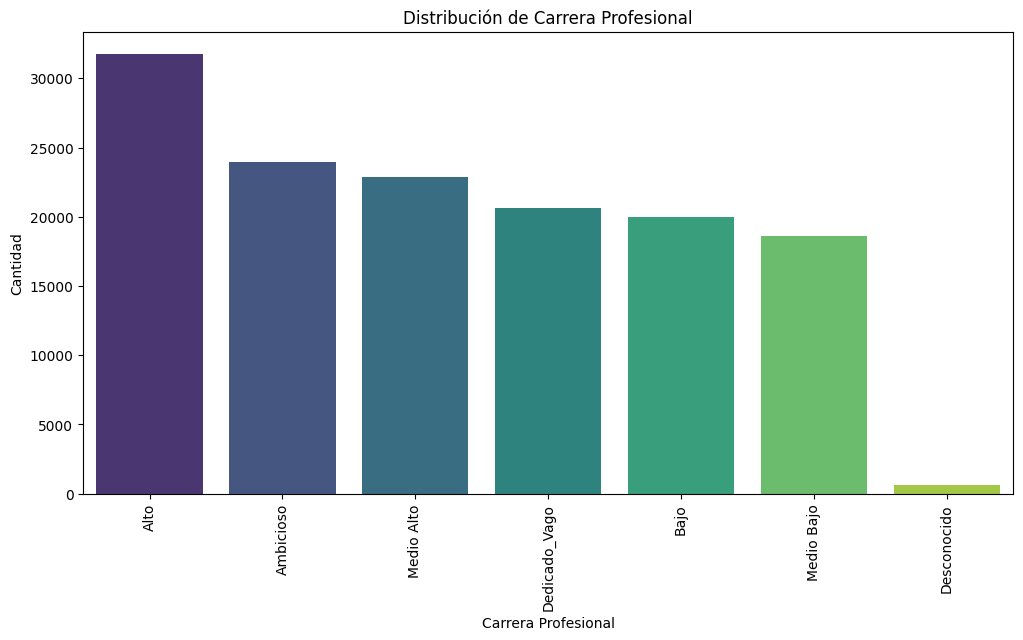

In [67]:
# Ver la distribución de frecuencias
distribution = processds['Esfuerzo'].value_counts()

# Mostrar las primeras filas
print(distribution)

# Visualizar con un gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=processds, x='Esfuerzo', order=distribution.index, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distribución de Carrera Profesional')
plt.xlabel('Carrera Profesional')
plt.ylabel('Cantidad')
plt.show()


##Nuevas filas


In [68]:
processds.info()

#41.34 Newprocessds=processds.drop(columns=['Esfuerzo','CIUDAD','PERIODO_RESULTADOS','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#40.43 Newprocessds=processds.drop(columns=['CIUDAD','PERIODO_RESULTADOS','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#41.37% Newprocessds=processds.drop(columns=['Esfuerzo','CIUDAD','ES_TECNOLOGICA_Y_TIENE_PC','periodo','NIVEL_EDUCATIVO_MADRE','NIVEL_EDUCATIVO_PADRE'])#
#42.92% Newprocessds=processds.drop(columns=[])
#43.23% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','PERIODO_RESULTADOS'])
#43.19% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','PERIODO_RESULTADOS'])
#42.71% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','PERIODO_RESULTADOS','Esfuerzo'])
#42.96% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES'])
#42.71% Newprocessds=processds.drop(columns=['ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','carrerasReducido'])
#42.15% Newprocessds=processds.drop(columns=['CARRERA_PROFESIONAL','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año','CÓDIGO'])
#43.09% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año','CÓDIGO'])
#42.96% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','año'])
#43.30% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO'])
#43.21% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','NIVEL_SOCIECONÓMICO_VIVIENDA'])
#42.04% Newprocessds=processds.drop(columns=['HORAS_SEMANALES_TRABAJO','carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','NIVEL_SOCIECONÓMICO_VIVIENDA'])
#43.34% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET'])
#42.91% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET','NIVEL_EDUCATIVO_PADRE'])
#43.68% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET.1'])
#43.09% Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CÓDIGO','CUENTA_CON_INTERNET.1','CUENTA_CON_INTERNET'])

Newprocessds=processds.drop(columns=['carrerasReducido','ANTECEDENTES_PENALES','ES_TECNOLOGICA_Y_TIENE_PC','CUENTA_CON_INTERNET.1'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138500 entries, 0 to 138499
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CÓDIGO                        138500 non-null  int64 
 1   PERIODO_RESULTADOS            138500 non-null  int64 
 2   CARRERA_PROFESIONAL           138500 non-null  object
 3   CIUDAD                        138500 non-null  object
 4   COSTO_MATRÍCULA_SOLES         138500 non-null  object
 5   HORAS_SEMANALES_TRABAJO       138500 non-null  object
 6   NIVEL_SOCIECONÓMICO_VIVIENDA  138500 non-null  object
 7   CUENTA_CON_INTERNET           138500 non-null  object
 8   NIVEL_EDUCATIVO_PADRE         138500 non-null  object
 9   CUENTA_CON_LAVADORA           138500 non-null  object
 10  TIENE_CARRO                   138500 non-null  object
 11  ANTECEDENTES_PENALES          138500 non-null  object
 12  PAGÓ_MATRÍCULA_POR_SU_CUENTA  138500 non-null  object
 13 

In [69]:
ds=Newprocessds

##descargar resultado

In [70]:
# Preparar los datos para predicción (sin la columna 'RENDIMIENTO_ACADÉMICO')
# Elimina la columna objetivo y 'CODIGO' para las predicciones
df_test_sin_objetivo = ds.copy()

# Predicciones sobre nuevos datos
predicciones = predictor.predict(df_test_sin_objetivo)

# Obtener la columna 'CODIGO' del nuevo dataset
codigo = df_test_sin_objetivo['CÓDIGO']
# Crear un DataFrame con 'CODIGO' y las predicciones
results_df = pd.DataFrame({
    'CÓDIGO': codigo,
    'RENDIMIENTO_ACADÉMICO': predicciones
})

# Mostrar las primeras filas de los resultados
print(results_df.head())

results_df.to_csv('lfernandogutierrezt_solucion.csv', index=False)


   CÓDIGO RENDIMIENTO_ACADÉMICO
0  345759                  bajo
1  925052                  alto
2  383355            medio-alto
3   70065                  alto
4    8675            medio-bajo


##Descargar modelo

In [80]:
import shutil

# Comprime el modelo
shutil.make_archive('/content/lfernandogutierrezt_model', 'zip', '/content/lfernandogutierrezt_model')

# Descarga el archivo comprimido
from google.colab import files
files.download('/content/lfernandogutierrezt_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>